
*This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price.*

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics


**1. Explore this dataset using what you have learned in data preprocessing and data visualization **

In [ ]:
 #importing the dataset from local drive
from google.colab import files


uploaded = files.upload()
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']),sep=",")

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We have only one variable "date" that is non numerical.
Since a variable year will be more useful to understand the data, we will take the year and drop the variable date.

In [ ]:
#creating variable date
#we take the first 4 elements from value date to get the year
df["year"]=df["date"]
row=-1
for d in df["year"]:
    row+=1
    v=""
    c=-1
    
    for i in d:
      c+=1
      if c<4:
        v+=i
    df["year"][row]=int(v)
df["year"].head()
        





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    2014
1    2014
2    2015
3    2014
4    2015
Name: year, dtype: object

In [ ]:
#converting variable year from object to integer
df['year'] = df['year'].astype('int')
df['year'].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: year, dtype: int64

In [ ]:
#Removing column date
df=df.drop("date",axis=1)

#Visualization

**2.Select the most important features (feature selection). **

We will start by showing the different correlations between the target "price" and the features to choose the best independent variable to regress the price on.

***Correlations***

In [ ]:
#Showing correlations with variable price
correl=df.corr()
pr_cr=correl.iloc[1:2,0::]
pr_cr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
price,-0.016762,1.0,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576


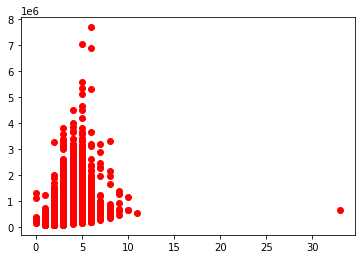

In [ ]:
#correlation between price and bedrooms
x=df["bedrooms"].values
y=df["price"].values
   
plt.plot(x,y,'ro')

The correlation between the variables "price" and "bedrooms" is weak (approximately 0.3) and the scatter diagram does not show a liner relationship, thus regressing the price on the number of bedrooms may not well explain the variation of house prices.

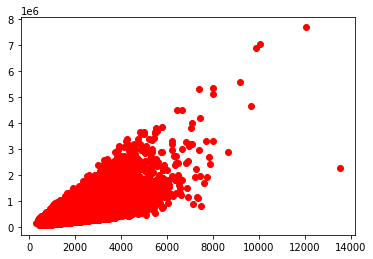

In [ ]:
#correlation between price and sqft_living 
x=df["sqft_living"].values
y=df["price"].values
   
plt.plot(x,y,'ro')

However, the correlation between "price" and "sqft living" is high (approximately 0.7) and from the scatter diagram we can notice a postive linear correlation between the variables, therefore, we will use them in our linear regression model.

**Simple Linear Regression**

**3. Split your dataset into a training set and a testing set.**

In [ ]:
#extracting x from our data
x=df["sqft_living"].values[:,np.newaxis]
#extracting y from our data
y=df["price"].values

In [ ]:
#Data Splitting with test set=35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

**4. Apply linear regression to your training set. **

In [ ]:
#building the linear regression model
model=LinearRegression()   
#fitting the training data
model.fit(x_train,y_train)  
#testing our model’s performance
predicted=model.predict(x_test) 
print("Predicted prices from our model using the test set:")
print(predicted)



Predicted prices from our model using the test set:
[1037032.06308369  730309.24206728  491747.04794341 ...  900710.80929862
  400866.2120867   352585.76803782]


In [ ]:
#slope
print("The slope is a= ",model.coef_[0])

The slope is a=  284.00261205222984


In [ ]:

#intercept
print("The intercept is b=",model.intercept_)

The intercept is b= -50697.9410763497


**5. Plot the linear regression. **

Text(0.5, 0, 'sqft_living')

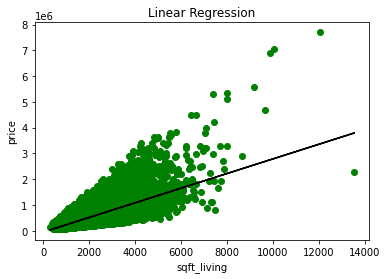

In [ ]:
#Plotting the Linear Regression
plt.scatter(x,y,color="g")
plt.plot(x,model.predict(x),color="k")

plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")

**6. Measure the performance of linear regression using the testing set. **

In [ ]:
#MSE
print("MSE", mean_squared_error(y_test,predicted))
#R squared
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


R squared is approximately 0.5,
therefore, 50% of the variation of the price can be explained by the regression.


Using these functions we get
a scatter diagram representing the correlation between **price and sqft_living** (with green dots)
and a line representing the ***predicted values of price*** given sqft_living

**Multiple Regression Model**

***6. Apply multiple-linear regression and compare it to the linear model.***

We will add more variables to our model in order to be able to explain the value of the dependent variable price.

The feature variables that are highly coorelated with the Target price are :
**sqft living** :corr=0.7020
**grade**: corr=0.667
**sqft above**: corr=0.6055
we will add these variables as inputs to our regression model.


In [ ]:
#extracting independent and dependent variables from our data
ind_var=df[["sqft_living", "grade"]]
dep_var=df["price"].values

In [ ]:
#Splitting the data with test size=35%
ind_train,ind_test,dep_train,dep_test=train_test_split(ind_var,dep_var,test_size=0.35,random_state=40)

In [ ]:
#Building a multiple linear regression model
mult_model=LinearRegression()
#Fitting the training data
mult_model.fit(ind_train,dep_train)
#Estimating prices using our model
estimated=mult_model.predict(ind_test)
print("Predicted prices from our model using the test set:")
print(estimated)


Predicted prices from our model using the test set:
[1100749.13892857  798691.00127035  442897.09057352 ... 1109335.39112725
  382697.72945362  251831.52498013]


In [ ]:

print("a1= ",mult_model.coef_[0])

a1=  188.12300349970423


In [ ]:
print("a2= ",mult_model.coef_[1])

a2=  98885.29387853942


In [ ]:
#intercept
print("The intercept is b=",model.intercept_)

The intercept is b= -50697.9410763497


price=**188.123** sqft_living+ **98885.294** grade-**50697.9411**

In [ ]:
#MSE
print("MSE", mean_squared_error(dep_test,estimated))
#R squared
print("R squared", metrics.r2_score(dep_test,estimated))

MSE 57413775762.864265
R squared 0.5433112989852686


Interpretation:
By adding the variable "grade" to the model, R squared increased from 50% to 54%, therefore, the mutiple regression model predicts better the house prices.

**7. Apply polynomial regression and compare it to linear and multilinear regression. **

**Polynomial Regression**

In [ ]:

#Extracting x and y
x= df[["sqft_living","grade"]]
y= df["price"].values
#data splitting 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  
#Building polynomial regression model
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
#transforming training data
x_train_fit = poly.fit_transform(x_train) 
#fitting the data
lg.fit(x_train_fit, y_train)

#trainsforming test data
x_test_ = poly.fit_transform(x_test)
#prediction
predicted = lg.predict(x_test_)
print("Predicted values with multi polynomial model:")
print(predicted)


Predicted values with multi polynomial model:
[1160198.87643245  751666.8626085   412734.79864015 ... 1210434.95424996
  385392.45938839  312446.02649591]


In [ ]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  50394480701.17275
R squared:  0.59914515943373


Comparing multiple linear model with multiple polynomial model:
Using the polynomial regression model, r squared is now approxiately 60% which is higher than R squared when we used the multiple linear model with the same features which was 54%.

*Plotting Polynomial Regression with 1 feature: sqft_living*

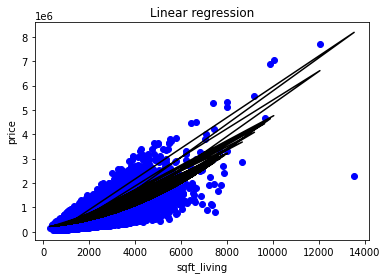

In [ ]:
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="b")
plt.title("Polynomial regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 